# Fourier series and power spectral density

We first try to understand how to do Fourier series and power spectral density analysis using a fake data.

In [77]:
import numpy as np
from scipy.fftpack import fft    # using fft function in Scipy package
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt

Make up the data

In [59]:
# Number of sample points
N = 600
# sample spacing
dt = 1.0 / 800.0                  # time length between each record (dt)
t = np.linspace(0.0, N*dt, N)     # time when data exists

# Make up the data using two sine functions with different frequencies
d = np.sin(50.0 * 2.0*np.pi*t) + 0.5*np.sin(80.0 * 2.0*np.pi*t)   

Get the frequencies

In [60]:
delf = 1/(N*dt)
freq = np.arange(0, 1/(2*dt)+delf, delf)
nfreq = np.arange(-(N//2-1)/N/dt, -1/N/dt, delf)
f = np.concatenate((freq, nfreq))
# or you can use the function in scipy
#f = fftfreq(N, dt)

Fourier transformation  
The ```fft``` function from Scipy computes

$$
 c_j = \sum^N_{n=1} d_n exp(-i \omega_j t_n)
$$

So, I devided $c$ by $N$ after using ```fft```. 

In [61]:
# Perform the discrete fourier transform
c = fft(d)/N

Plot the data

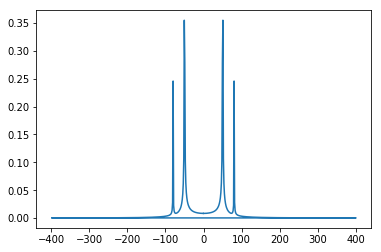

In [62]:
plt.plot(f, np.abs(c))    # c is a complex array, and we want to find out its size.

This is actually the power spectral density function.  
You may notice that c is symmetry around the zero frequency.
So, we usually plot the power with non-negative frequencies after doubling the amplitude.

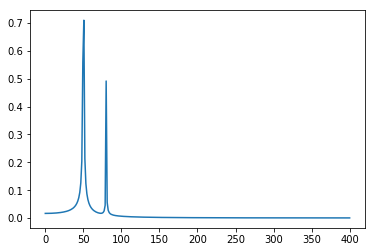

In [73]:
plt.plot(freq, 2*np.abs(c[:(N//2+1)]))
#plt.plot(freq, np.log10(2*np.abs(c[:(N//2+1)])))

We can verify that most of the power (variability) are concentrated around the frequency $f=50$ and $f=80$, with greater power for $f=50$.

The ```Numpy``` package also provides a function for Fourier transformation.  
See the example below.

In [74]:
npc = np.fft.fft(d)/N

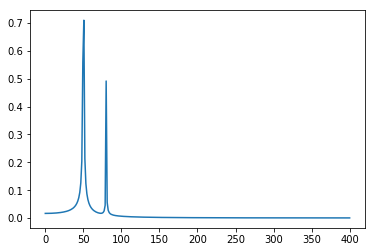

In [76]:
plt.plot(freq, 2*np.abs(npc[:(N//2+1)]))